データ件数: (500, 2)
          new       year2
0  200.614633  181.027960
1  199.716863  164.124190
2  205.733141  171.638352
3  193.768958  174.801830
4  206.248877  198.362352


/Users/uetsuki/Desktop/dsdev/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/uetsuki/Desktop/dsdev/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/uetsuki/Desktop/dsdev/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/uetsuki/Desktop/dsdev/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24453 (\N{CJK UNIFIED IDEOGRAPH-5F85}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/uetsuki/Desktop/dsdev/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.

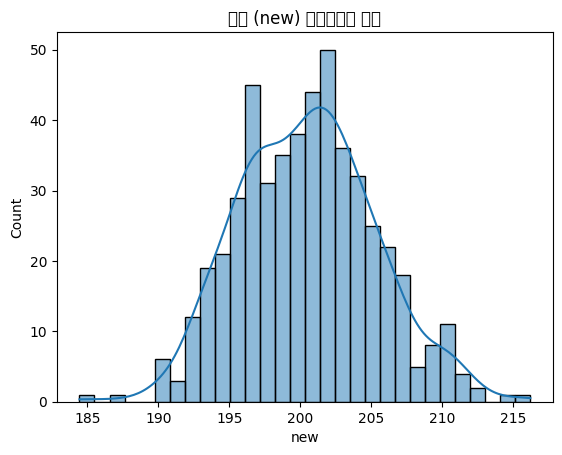

/Users/uetsuki/Desktop/dsdev/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/uetsuki/Desktop/dsdev/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/uetsuki/Desktop/dsdev/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/uetsuki/Desktop/dsdev/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24453 (\N{CJK UNIFIED IDEOGRAPH-5F85}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/uetsuki/Desktop/dsdev/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.

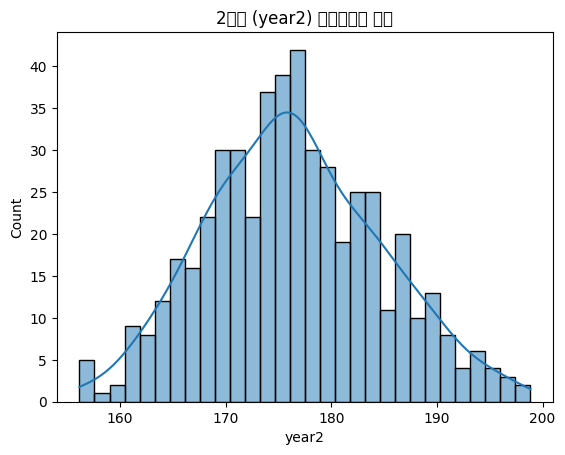

新品 (new) の母平均の推定値: 200.4746372262155
新品 (new) の95%信頼区間: (np.float64(200.0533518842937), np.float64(200.89592256813728))
2年後 (year2) の母平均の推定値: 176.40215071111032
2年後 (year2) の95%信頼区間: (np.float64(175.6736405178838), np.float64(177.13066090433685))


/Users/uetsuki/Desktop/dsdev/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/uetsuki/Desktop/dsdev/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/uetsuki/Desktop/dsdev/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/uetsuki/Desktop/dsdev/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


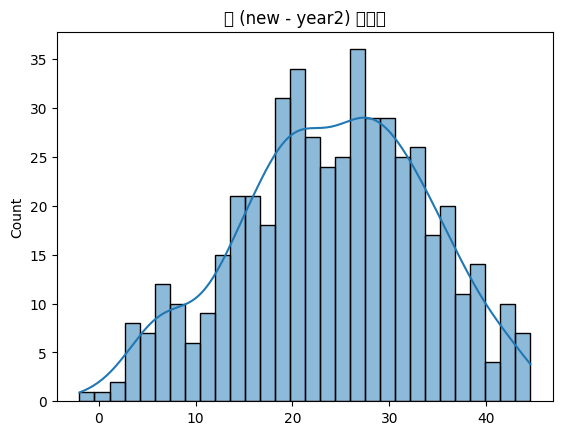

対応のあるt検定の結果
t値: 9.465273816769793
p値: 1.159466251292928e-19


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, ttest_1samp

# ----------------------------------------
# データ読み込み
# ----------------------------------------
df = pd.read_csv("batteries_hours.csv")

# データ件数と先頭確認
print("データ件数:", df.shape)
print(df.head())

# ----------------------------------------
# new と year2 のヒストグラムと分布
# ----------------------------------------
sns.histplot(df["new"], bins=30, kde=True)
plt.title("新品 (new) の待受時間 分布")
plt.show()

sns.histplot(df["year2"], bins=30, kde=True)
plt.title("2年後 (year2) の待受時間 分布")
plt.show()

# ----------------------------------------
# 母平均の推定値と95%信頼区間を求める関数
# ----------------------------------------
def mean_ci_95(x):
    x = x.dropna().to_numpy()
    n = len(x)
    xbar = x.mean()
    s = x.std(ddof=1)
    SE = s / np.sqrt(n)
    tcrit = t.ppf(0.975, df=n-1)
    return xbar, (xbar - tcrit*SE, xbar + tcrit*SE)

# ----------------------------------------
# new の母平均の推定値と95%信頼区間
# ----------------------------------------
mean_new, ci_new = mean_ci_95(df["new"])
print("新品 (new) の母平均の推定値:", mean_new)
print("新品 (new) の95%信頼区間:", ci_new)

# ----------------------------------------
# year2 の母平均の推定値と95%信頼区間
# ----------------------------------------
mean_y2, ci_y2 = mean_ci_95(df["year2"])
print("2年後 (year2) の母平均の推定値:", mean_y2)
print("2年後 (year2) の95%信頼区間:", ci_y2)

# ----------------------------------------
# new と year2 の差を計算
# ----------------------------------------
diff = df["new"] - df["year2"]

sns.histplot(diff, bins=30, kde=True)
plt.title("差 (new - year2) の分布")
plt.show()

# ----------------------------------------
# 対応のあるt検定
# H0: 減少量の平均 = 20
# H1: 減少量の平均 ≠ 20
# ----------------------------------------
res = ttest_1samp(diff, popmean=20)
print("対応のあるt検定の結果")
print("t値:", res.statistic)
print("p値:", res.pvalue)


### 結論
対応のある t 検定の結果、p値 ≈ 1.16e-19 であった。  
有意水準を 5% とすると、p値 < 0.05 なので帰無仮説（「平均減少は20時間である」）を棄却する。  
よって、平均減少は20時間と異なると判断できる。
